#Get data from Kaggle

# **MODEL**

In [1]:
from copy import deepcopy
from dataclasses import dataclass
import multiprocessing as mp
from re import T
import torchvision.models as models
import torch
import copy
import torch.nn.functional as F
#from model import net
import random
import multiprocessing as mp
import os
import os
import torch
import torch.distributed as dist
import torch.multiprocessing as mp
from torchvision import datasets,transforms
import random
from torch import optim,ceil
import torchvision.models as models
import torch.nn.functional as F
from torch import nn
import pickle
import numpy as np
import torchvision.models as models
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
import torch
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
class HistoryStorage():
  

In [5]:
a=pd.read_csv('../Data/data1k.csv')

In [14]:
a

Unnamed: 0                 image  complex  frog_eye_leaf_spot  healthy  \
0           4871  a5d29ea15c2be463.jpg        0                   0        0   
1           4095  a161c1cdcbd684bb.jpg        1                   0        0   
2          13857  e0e58d0d5652739b.jpg        0                   1        0   
3          15451  ece5cd0b1cf09269.jpg        0                   0        1   
4          12614  d7e9f82e8c0611cd.jpg        0                   0        0   
...          ...                   ...      ...                 ...      ...   
5995        5385  a96ad6979a939194.jpg        1                   0        0   
5996         150  80e0699f1d1b373d.jpg        0                   0        0   
5997        5106  a83bee3bc07e808d.jpg        0                   0        1   
5998          92  80a2c93fd2d9655d.jpg        0                   0        1   
5999        3546  9d4a3a18eec773a0.jpg        0                   0        0   

      powdery_mildew  rust  scab  labels  
0                  0     0     1       5  
1                  0     0     0       0  
2                  0     0     0       1  
3                  0     0     0       2  
4                  1     0     0       3  
...              ...   ...   ...     ...  
5995               0     0     0       0  
5996               0     1     0       4  
5997               0     0     0       2  
5998               0     0     0       2  
5999               1     0     0       3  

[6000 rows x 9 columns]

0       5
1       0
2       1
3       2
4       3
       ..
5995    0
5996    4
5997    2
5998    2
5999    3
Name: labels, Length: 6000, dtype: int64

In [ ]:
def clientData_generator(numLabel,numData):
    
clientData_generator(3)

In [49]:
import random
import pandas as pd

df=a
numLabel=3
numData=52
label_list=random.sample(range(0,6),5)
print(label_list)
data_list=[random.choice(label_list) for times in range(0,numData)]
print(data_list)


[3, 1, 5, 4, 0]
[0, 0, 1, 3, 4, 5, 3, 4, 1, 4, 0, 1, 0, 4, 3, 5, 1, 0, 3, 0, 0, 5, 1, 5, 4, 3, 4, 0, 3, 1, 0, 3, 1, 3, 1, 3, 1, 5, 1, 5, 4, 3, 4, 4, 1, 1, 1, 0, 4, 4, 5, 5]


Unnamed: 0                 image  complex  frog_eye_leaf_spot  healthy  \
0           4871  a5d29ea15c2be463.jpg        0                   0        0   
1           4095  a161c1cdcbd684bb.jpg        1                   0        0   
2          13857  e0e58d0d5652739b.jpg        0                   1        0   
4          12614  d7e9f82e8c0611cd.jpg        0                   0        0   
5          17366  f8f5ca9394cd3940.jpg        0                   0        0   
...          ...                   ...      ...                 ...      ...   
5993        6183  ad600a9ff749958a.jpg        0                   1        0   
5994       11591  d0c821fcd1f5d30d.jpg        0                   0        0   
5995        5385  a96ad6979a939194.jpg        1                   0        0   
5996         150  80e0699f1d1b373d.jpg        0                   0        0   
5999        3546  9d4a3a18eec773a0.jpg        0                   0        0   

      powdery_mildew  rust  scab  labels  
0                  0     0     1       5  
1                  0     0     0       0  
2                  0     0     0       1  
4                  1     0     0       3  
5                  0     0     1       5  
...              ...   ...   ...     ...  
5993               0     0     0       1  
5994               0     0     1       5  
5995               0     0     0       0  
5996               0     1     0       4  
5999               1     0     0       3  

[4392 rows x 9 columns]

In [54]:
label_list=random.sample(range(0,6),3)

df.loc[df['labels'].isin(label_list)].sample(52)

Unnamed: 0                 image  complex  frog_eye_leaf_spot  healthy  \
4414       12636  d837d922d813e969.jpg        0                   0        0   
3070       11610  d0dd7a8470d5b09d.jpg        0                   0        1   
909         1512  8ba5d79798b86815.jpg        0                   0        1   
347        17868  fc7fd461eac15500.jpg        0                   0        1   
2728       17606  faaeda0e88d888da.jpg        0                   0        1   
1379        8636  bda0edcb5e05f0a0.jpg        0                   0        1   
4685       13687  e04e811c9ffd12b9.jpg        1                   0        0   
2390        6132  ad1cd41cda17cc17.jpg        0                   0        0   
5297        1611  8cabfc30e0a380ff.jpg        0                   0        1   
2093        8982  bfe0c39e9c396007.jpg        1                   0        0   
3635        1369  8a7526cbd23ce1e2.jpg        0                   0        1   
4852        6045  aca757918d942a76.jpg        0                   0        1   
2016       14519  e5b0fdf416025b0e.jpg        0                   0        1   
4204        1232  892ed2119c39797b.jpg        0                   0        0   
5905        7527  b56180f6fd9223c6.jpg        0                   0        1   
100        11189  ce5590bd4e0e27c3.jpg        0                   0        1   
3429       13323  ddbf2eddd98c8000.jpg        0                   0        1   
3109       17261  f8a2171e4f1f0d83.jpg        0                   0        1   
1999        8726  be2dc4c1a17a0b3b.jpg        0                   0        1   
3351        6563  af55875c5e685a03.jpg        0                   0        1   
5264        3485  9c968ac989ed332e.jpg        1                   0        0   
4899       14038  e1b9a3929e0447f3.jpg        1                   0        0   
5930        4250  a1e7dec49e4a909a.jpg        0                   0        1   
2156        8275  bac3ed8f1d058a38.jpg        0                   0        1   
5842        5671  aaa6aa7a49a365a5.jpg        0                   0        1   
121          736  85321fc53ce5e172.jpg        0                   0        1   
4173       16503  f469c3da0e5a1572.jpg        0                   0        1   
3541         672  84cf8c8fd5978b81.jpg        0                   0        1   
1479       10487  c8a53fb6b0653e24.jpg        0                   0        1   
5410        8641  bda802d96a659537.jpg        0                   0        1   
1637       16720  f514d58e50bf21a9.jpg        0                   0        1   
1704        5569  aa4ec09174ef58d3.jpg        0                   0        1   
3114       15663  eeec941f18c07c78.jpg        0                   0        1   
820         3128  9849732bc93267d9.jpg        0                   0        1   
5762       17559  fa7990b5b842c752.jpg        0                   0        0   
492         3188  98ddd09991a9370f.jpg        0                   0        1   
646        13113  dc0acfe53c673190.jpg        0                   0        1   
5520        1490  8b7ef0421e19ae5a.jpg        0                   0        0   
1382       12826  d9a4e38184ce7c7c.jpg        0                   0        0   
3253        2528  949b6595a5b8ca3c.jpg        1                   0        0   
1641       13256  dd343f9039037987.jpg        0                   0        1   
4884       15396  ec62934398749f5a.jpg        0                   0        0   
4986        4948  a64618bfbc6ad514.jpg        1                   0        0   
2420       13101  dbee22785d9285c4.jpg        0                   0        0   
3238        9156  c0a42dfd195dd331.jpg        0                   0        1   
4608        8244  baa4cf3860e25e9a.jpg        0                   0        0   
4718        1875  8f25789f673025ca.jpg        0                   0        0   
5998          92  80a2c93fd2d9655d.jpg        0                   0        1   
200          865  85ca96c786858dde.jpg        0                   0        1   
1205  

In [4]:
a=a.sort_values('labels')
a

Unnamed: 0                 image  complex  frog_eye_leaf_spot  healthy  \
5101        6631  afa1159ace687174.jpg        1                   0        0   
488        16135  f161a75a4a952d0f.jpg        1                   0        0   
4694       11574  d0bc1fd438bcb530.jpg        1                   0        0   
5318        4257  a1ebe7085e765413.jpg        1                   0        0   
4088       10669  c9e5e7cc99b8830a.jpg        1                   0        0   
...          ...                   ...      ...                 ...      ...   
2045        9607  c28f1df09d656c0d.jpg        0                   0        0   
2047       11000  ccc1f9631f608b36.jpg        0                   0        0   
2051        6967  b1b728cb891b99b1.jpg        0                   0        0   
2003        8493  bce8f697820acb70.jpg        0                   0        0   
0           4871  a5d29ea15c2be463.jpg        0                   0        0   

      powdery_mildew  rust  scab  labels  
5101               0     0     0       0  
488                0     0     0       0  
4694               0     0     0       0  
5318               0     0     0       0  
4088               0     0     0       0  
...              ...   ...   ...     ...  
2045               0     0     1       5  
2047               0     0     1       5  
2051               0     0     1       5  
2003               0     0     1       5  
0                  0     0     1       5  

[6000 rows x 9 columns]

In [17]:
a['labels'].value_counts()

5    1599
2    1465
1    1233
0     700
4     617
3     386
Name: labels, dtype: int64

In [20]:
b=a.groupby('labels').head(1599)

In [21]:
b['labels'].value_counts()

5    1599
2    1465
1    1233
0     700
4     617
3     386
Name: labels, dtype: int64

In [2]:

from torch.utils.data import Dataset,DataLoader


class plantdisease(Dataset):
    def __init__(self, train_df='data/raw/train.csv',test_df='data/raw/test.csv'
                 , img_dir='data/oneFolder'
                 , isTest=False,rank=0,central=False,data=None,num_client=20):
        """
        self.isTest (boolean) :test or not
        self.rank
        self.img_labels (csv) : data to generate -> 
        self.shardsList(list(csv)) : list of parts was splitted from train
        self.data (csv) : data server assign to each clients when generate (using self.makeClientDataSet() function to return data for clients )
            path: Server -> create plantdisease(isTest=True,central=True,num_client) -> plantdisease split train - test (use for server evaluation) -> {train} part continue splitted by the number of clients
            -> self.makeClientDataSet(rank) return part of rank^th shardsList
                  Client -> create local plantdiseas(central=False,data= return of server.dataset.makeClientDataSet(rank)) -> trainning
        """
        #Read dataset (balanced.csv is remake dataset that equalized all len(class))
        self.img_labels=pd.read_csv('../Data/data1k.csv')
        self.img_dir='../Data/train_images/'
        #Sort dataset by columns '1' (columns of labels)
        
        #self.img_labels=self.img_labels.drop([i for i in range(2101,5000)],axis=0)

        #If central -> split train - test data
        if central:
            self.train, self.test = train_test_split(self.img_labels, test_size=0.2)
            self.train.reset_index(inplace=True)
            self.test.reset_index(inplace=True)
            if isTest:
                self.img_labels=self.test
                #self.data_csv=self.data_csv.sort_values('labels')
                self.data_csv=self.data_csv
            else:
                self.img_labels=self.train
            #self.img_labels=self.img_labels.sort_values('labels')
            self.img_labels=self.img_labels.sort_values('labels')
        #Split dataset by the number of num_client (so every client would have their own dataset) -> at most a client can contain 2 class of data
            self.shardsList=np.array_split(self.img_labels,num_client)
        else:
            self.data_csv=data
            self.data_csv.reset_index(inplace=True)
        #rank of client
        self.rank=rank
        self.isTest=isTest

        #Check if data exist -> also mean this is client
        if isinstance(data, pd.DataFrame):
            #Assign data to dataset
            self.img_labels=data



        #if rank:
        #    self.img_labels,old_csv=self.make_newCSV()

        #Muon train cung class cho train va test
        #self.train, self.test = train_test_split(self.img_labels, test_size=0.2)
        #self.train, self.test = train_test_split(self.img_labels, test_size=0.05)

            
        #self.test=self.test.append(old_csv)
    def makeClientDataSet(self,rank):
        newCSV=self.shardsList[rank]
        return newCSV

 #   def makeClientDataSet(self,rank):
 #       import random
 #       a=random.randint(0, 5)
 #       b=random.randint(5, 14)
 #       c=random.randint(5, 14)
 #       classList=[rank]
 #       old_csv=self.train
 #       newCSV=old_csv[(old_csv.iloc[:,2].isin(classList) ) ]

        
 #       return newCSV

 #Use to change state of dataset
    def changeisTest(self,boole):
        self.isTest=boole
        #Update img_labels
        if self.isTest:
            self.img_labels=self.test
        else:
            self.img_labels=self.train
    def __len__(self):
        return len(self.img_labels)
    #def make_newCSV(self):
    #    old_csv=self.img_labels
    #    newCSV=old_csv[old_csv.iloc[:,2]==(self.rank)]

        return newCSV,old_csv
    def __getitem__(self, idx):
            img_path = os.path.join(self.img_dir, self.img_labels['image'][idx])

            image = (read_image(img_path).float())
            self.transform=transforms.Compose([
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),transforms.Resize([ 200, 300])])
            image = self.transform(image)
            label = self.img_labels['labels'][idx]

            return image, label

In [4]:
def plotLabelDistribution(x,y,name):
  #X : 
  import plotly.express as px
  fig = px.bar(y=y,x=x,color=x,title='Dataset of '+ name,text_auto=True,labels={'x':'Disease','y':'Counts'})
  fig.show()


In [10]:
plotLabelDistribution(x=data.sample(800).labels.value_counts().keys(),y=data.sample(800).labels.value_counts().values,name='Tes')

NameError: name 'data' is not defined

In [ ]:
a.list_Client[0].dataset.data_csv.labels.value_counts()

0    12
Name: labels, dtype: int64

In [3]:
class Client():
    def __init__(self,id=9999,dataClass=0,initModel=models.mobilenet_v2(pretrained=True),dataset=None,parameters=None):
        self.id=id
        self.dataClass=dataClass
        self.curModel=initModel
        #For test
        #self.curModel.classifier[1]=(torch.nn.Linear(in_features=1280, out_features=15, bias=True))
        #Parameters:
        self.dataset=plantdisease(isTest=False,data=dataset)
        #self.dataset=dataGeneMNIST.MNIST(isTest=False,data=dataset)
        self.learning_rate=parameters['learning_rate']
        self.momentum=parameters['momentum']
        self.batch_size=parameters['batch_size']
        self.local_epoch=parameters['local_epoch']
        self.weight_decay=parameters['weight_decay']
        self.lossHist=[]
    def __len__(self):
        return len(self.dataset)
    def set_learningrate(self,learning_rate):
        self.learning_rate=learning_rate
    def clientID(self):
        print("ID of client: {}".format(self.id))
    def processID(self):
        print("ID of process: {}".format(os.getpid()))



    def client_train(self,lr=0.0003,epoch=10,optimizer=None):
        print("Client , data: {} trainning".format(self.id))
        
        model = self.curModel
        self.optimizer =optim.SGD(model.classifier.parameters(),lr=self.learning_rate,momentum=self.momentum)
        ####

        dataLoader=torch.utils.data.DataLoader(self.dataset,
                                         batch_size=int(self.batch_size),
                                         shuffle=True)

        ######
        for epoc in range(epoch):
            epoc_loss = 0.0
            for data, target in dataLoader:
            #
                #data = data.repeat(1, 3, 1, 1)
            #
                self.optimizer.zero_grad()
                output = model(data)
                loss = torch.nn.CrossEntropyLoss()(output, target)
                epoc_loss += loss.item()
                loss.backward()
                self.optimizer.step()
            
            print('Client ID ', self.id, ', epoch ',
              epoc, ': ', epoc_loss / self.batch_size)
        torch.cuda.empty_cache()
    def client_trainGPU(self,epoch=0):
        lr=self.learning_rate
        
        print("Client {}, data: {} trainning".format(self.id,self.id))
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.curModel.to(device)
        #self.dataset.changeisTest(False)
        ####
        self.optimizer =optim.Adam(self.curModel.parameters(),lr=self.learning_rate,weight_decay=self.weight_decay)
        dataLoader=torch.utils.data.DataLoader(self.dataset,
                                         batch_size=int(self.batch_size),
                                         shuffle=True)

        ######
        for epoc in range(epoch):
            epoc_loss = 0.0
            for data, target in dataLoader:
            #
            #data = data.repeat(1, 3, 1, 1)
            #   
                
                data,target=data.to(device),target.to(device)
                
                
                output = self.curModel(data)
                loss = torch.nn.CrossEntropyLoss()(output, target)

                epoc_loss += loss.item()
                self.optimizer.zero_grad(set_to_none=True)
                loss.backward()
                self.optimizer.step()
            
            print('Client ID ', self.id, ', epoch ',
              epoc, ': ', epoc_loss / self.batch_size)
            self.lossHist.append(epoc_loss)
        self.curModel.to('cpu')
        
    #Hỏng
    def client_evaluate(self):
        self.curModel.eval()
        testDataset=self.dataset
        testDataset.changeisTest(True)
        testDataLoader=torch.utils.data.DataLoader(testDataset,
                                         batch_size=int(20),
                                         shuffle=True)
        test_loss,correct=0,0
        #device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.curModel.to(0)
        with torch.no_grad():
            for data,labels in testDataLoader:
                data,labels=data.to(0),labels.to(0)
                outputs=self.curModel(data)
                test_loss+=torch.nn.CrossEntropyLoss()(outputs, labels).item()
                predicted=outputs.argmax(dim=1,keepdim=True)
                print(labels)
                print('-----')
                correct += predicted.eq(labels.view_as(predicted)).sum().item()
                print(predicted)
        test_loss = test_loss / len(testDataLoader)
        test_accuracy=correct/len(testDataset)
        message = f"\t[Client {(self.id)}] ...finished evaluation!\
            \n\t=> Test loss: {test_loss:.4f}\
            \n\t=> Test accuracy: {100. * test_accuracy:.2f}%\n"
        print(message, flush=True)
#a=Client(dataClass=1)
#a.client_trainGPU(epoch=30)
#def saveServer(server):
#    import pickle
#    with open('server.pickle', 'wb') as f:
#        pickle.dump(server, f)
#saveServer(a)
#a.client_evaluate()

class server():
    def __init__(self,tensorboard,parameters):
        self.list_Client=[]
        self.centralModel=models.mobilenet_v2(pretrained=True)
        
        self.centralModel.classifier[1]=(torch.nn.Linear(in_features=1280, out_features=6, bias=True))
        self.centralDataset=plantdisease(isTest=False,rank=None,central=True,num_client=parameters['server']['num_clients'])
        self.parameters=parameters
        self.num_clients=parameters['server']['num_clients']
        self.num_round=parameters['server']['num_round']
        self.num_client_perRound=parameters['server']['num_client_perRound']
        self.isParallel=parameters['server']['isParallel']
        self.local_epoch=parameters['server']['local_epoch']
        self.accuracyHist=[]
        self.lossHist=[]
    def __len__(self):
        return len(self.list_Client)

    def changeLR(self,lr):
        for client in self.list_Client:
            client.set_learningrate(lr)
    def generateClient(self):
        #print('List class {} '.format(dices_classs))
        for i in range(0,self.num_clients):

            #makeClientDataSet(rank) -- with rank is the id of shards data
            datasetTemp=self.centralDataset.makeClientDataSet(rank=i)
            #Assign each client a shard of dataset 
            self.list_Client.append(Client(id=i,dataset=datasetTemp,initModel=copy.deepcopy(self.centralModel),parameters=self.parameters['client']))
        #for i in dices_classs:
        #    if(i>14):
        #        datasetTemp=self.centralDataset.makeClientDataSet(rank=random.randint(0, 10))
        #    else:
        #        datasetTemp=self.centralDataset.makeClientDataSet(rank=i)
        #    self.list_Client.append(client.Client(id=i,dataset=datasetTemp,initModel=copy.deepcopy(self.centralModel),parameters=self.parameters['client']))

    def updateClientModel(self):
        params=self.collectModel()
        paraAverage=self.averageModel(params)
        self.centralModel.load_state_dict(paraAverage)
        
        for idx in self.list_Client:
            #Sửa thử xem load_state_dict lcu1 trước làm việc có đúng ko
            #client.curModel.load_state_dict(paraAverage)
            idx.curModel=copy.deepcopy(self.centralModel)
        print('All clients updated')
    def collectModel(self):
        model_params=[]
        for client in self.Dices:
            model_params.append(client.curModel.state_dict())
        return model_params
    def averageModel(self,params):
        total_len=0
        for i in self.Dices:
            total_len+=len(i)
        listClient_thisRound=self.Dices
        
        #coef=torch.tensor([len(listClient_thisRound[i])/total_len for i in range(0,len(listClient_thisRound)-1)])
        #coef=1/len(listClient_thisRound)
        global_model_weights = copy.deepcopy(self.centralModel.state_dict())
        for key in global_model_weights:
            global_model_weights[key] = torch.zeros_like(
                global_model_weights[key])
        
        #server_params=copy.deepcopy(self.centralModel.parameters())
        for user in listClient_thisRound:
            local_model_weights = copy.deepcopy(user.curModel.state_dict())
            for key in global_model_weights:
                if str(global_model_weights[key].type())!='torch.LongTensor':
                    global_model_weights[key] += (1 / len(listClient_thisRound)) * local_model_weights[key]
        return global_model_weights
        print('finish average')
        #coef=1
        # from collections import OrderedDict
        # paraOut=OrderedDict()
        # for key in params[0]:
        #     if key=='classifier.1.weight' or key=='classifier.1.bias'  :
        #         paraOut[key] = sum([params[i][key]*coef[i] for i in range(0,len(params)-1)])
        #     else:
        #         paraOut[key]=params[0][key]
            #paraOut[key] = sum([params[i][key]*coef[i] for i in range(0,len(params)-1)])
        #return paraOut
        #for i in range(0,len(params)-1):
        #    for key in params[0]:
        #        if i==0:
         #           paraOut[key]=params[i][key]*coef[i]
         #       else:
         #           paraOut[key]+=params[i][key]*coef[i]
    def evaluate_CentralModel(self):
        model=self.centralModel
        model.eval()
        self.centralDataset.changeisTest(True)
        testDataLoader=torch.utils.data.DataLoader(self.centralDataset,
                                         batch_size=int(20),
                                         shuffle=True)
        test_loss,correct=0,0

        with torch.no_grad():
            for data,labels in testDataLoader:
                outputs=self.centralModel(data)


                test_loss+=torch.nn.CrossEntropyLoss()(outputs, labels).item()
                predicted=outputs.argmax(dim=1,keepdim=True)
                print('Labels')
                print(predicted)
                print('------------------------')
                correct += predicted.eq(labels.view_as(predicted)).sum().item()
        test_loss = test_loss / len(testDataLoader)
        test_accuracy=correct/len(self.centralDataset)
        self.accuracyHist.append(test_accuracy)

        self.lossHist.append(test_loss)
        print(self.lossHist)
        print(self.accuracyHist)
        message = f"\t[Central Model ] ...finished evaluation!\
            \n\t=> Test loss: {test_loss:.4f}\
            \n\t=> Test accuracy: {100. * test_accuracy:.2f}%\n"
        print(message, flush=True)
        self.centralDataset.changeisTest(False)

        print('next round')
    def trainClientsQueue(self):
        print("There are {} client in environment".format(len(self.list_Client)))
        from random import sample
        self.Dices=sample(self.list_Client,self.num_client_perRound)
        print("This epoch have clients with id {}".format(self.Dices))
        for client in self.Dices:
            #plotLabelDistribution(x=client.dataset.data_csv.labels.value_counts().keys(),y=client.dataset.data_csv.labels.value_counts(),name='Client '+str(client.id))

            client.client_trainGPU(epoch=self.local_epoch)

        print("Finish train per client")
        self.updateClientModel()
        self.evaluate_CentralModel()
        #print([self.list_Client[idx].id for idx in self.Dices])
    def roundTrain(self):
        self.trainClientsQueue()

In [ ]:
i=1
name='/content/drive/MyDrive/Prethesis-model/server{}.pickle'.format(i)
name

'/content/drive/MyDrive/Prethesis-model/server1.pickle'

In [ ]:
from google.colab import files
uploaded = files.upload()

# **RUN**

FROM BEGINNING

Case {'dataset': 'plantdisease',
 'client': {'learning_rate': 5e-05,
  'momentum': 0.0,
  'weight_decay': 9e-05,
  'batch_size': 30,
  'local_epoch': 1},
 'server': {'num_clients': 100,
  'num_class': 6,
  'num_round': 100,
  'num_client_perRound': 25,
  'isParallel': 'False',
  'model': 'mobilenetv3',
  'local_epoch': 10}}

In [10]:
info={'dataset': 'plantdisease',
 'client': {'learning_rate': 5e-05,
  'momentum': 0.0,
  'weight_decay': 9e-05,
  'batch_size': 30,
  'local_epoch': 1},
 'server': {'num_clients': 100,
  'num_class': 6,
  'num_round': 100,
  'num_client_perRound': 15,
  'isParallel': 'False',
  'model': 'mobilenetv3',
  'local_epoch': 10}}
from importlib.abc import Loader
import yaml
from yaml.loader import SafeLoader


if __name__ == '__main__':
    def saveServer(server):
        import pickle
        with open('./model1.pickle', 'wb') as f:
            pickle.dump(server, f)

    a=server(tensorboard=0,parameters=info)
    a.generateClient()
    for i in range(0,info['server']['num_round']):
      print("Round {}".format(i))
      a.roundTrain()
      if(i%5==0):
        print('Server saved {}'.format(i))
        saveServer(a)
    #writer.flush()

Round 0
There are 100 client in environment
This epoch have clients with id [<__main__.Client object at 0x0000015B19232EB0>, <__main__.Client object at 0x0000015AFEEBAF40>, <__main__.Client object at 0x0000015B1C34EE50>, <__main__.Client object at 0x0000015B0C4F8EE0>, <__main__.Client object at 0x0000015ADE608D90>, <__main__.Client object at 0x0000015AE7794DF0>, <__main__.Client object at 0x0000015AFFD1CF10>, <__main__.Client object at 0x0000015B02E127C0>, <__main__.Client object at 0x0000015AF625AE50>, <__main__.Client object at 0x0000015B013F0FA0>, <__main__.Client object at 0x0000015B1F466E80>, <__main__.Client object at 0x0000015B0C88BEE0>, <__main__.Client object at 0x0000015AE0D0C400>, <__main__.Client object at 0x0000015B1F100E20>, <__main__.Client object at 0x0000015AE1590FA0>]
Client 71, data: 71 trainning
Client ID  71 , epoch  0 :  0.12140396038691202
Client ID  71 , epoch  1 :  0.10057363112767538
Client ID  71 , epoch  2 :  0.08618843952814738
Client ID  71 , epoch  3 :  0

In [6]:
len(a.list_Client[0])

57

In [15]:
a=pd.read_csv('../Data/data1k.csv')

In [18]:
a

Unnamed: 0                 image  complex  frog_eye_leaf_spot  healthy  \
0          18165  fda1898fb8d05ad0.jpg        0                   0        0   
1          14900  e8f0da91d370692d.jpg        0                   1        0   
2           4993  a6da180e03fce94f.jpg        0                   1        0   
3          11216  cea4b5c20b839f0f.jpg        0                   0        0   
4          14637  e70cc58572bcc35c.jpg        0                   0        1   
...          ...                   ...      ...                 ...      ...   
5995       17392  f915b2fa58e9e018.jpg        0                   0        0   
5996        3775  9f9c55656a4592b2.jpg        0                   0        1   
5997        1921  8f8fe24b80e21cb7.jpg        1                   0        0   
5998        4017  a0d05afa7825e5f4.jpg        0                   0        0   
5999         877  85d4d29ab7e1a346.jpg        0                   0        0   

      powdery_mildew  rust  scab  labels  
0                  0     0     1       5  
1                  0     0     0       1  
2                  0     0     1       1  
3                  0     0     1       5  
4                  0     0     0       2  
...              ...   ...   ...     ...  
5995               0     0     1       5  
5996               0     0     0       2  
5997               0     0     0       0  
5998               0     0     1       5  
5999               0     0     1       5  

[6000 rows x 9 columns]

In [23]:
a.iloc[:,2:-1].sum(axis=1)

0       1
1       1
2       2
3       1
4       1
       ..
5995    1
5996    1
5997    1
5998    1
5999    1
Length: 6000, dtype: int64

In [ ]:
!cp -b /content/drive/MyDrive/Prethesis-model/server1.pickle /content/drive/MyDrive/Prethesis-model/server1backup.pickle


In [5]:
import pickle
info={'dataset': 'plantdisease',
 'client': {'learning_rate': 5e-05,
  'momentum': 0.0,
  'weight_decay': 9e-05,
  'batch_size': 30,
  'local_epoch': 1},
 'server': {'num_clients': 100,
  'num_class': 6,
  'num_round': 100,
  'num_client_perRound': 15,
  'isParallel': 'False',
  'model': 'mobilenetv3',
  'local_epoch': 10}}
from importlib.abc import Loader
import yaml
from yaml.loader import SafeLoader
conti=[]

def saveServer(server):
  import pickle
  with open('./model1.pickle', 'wb') as f:
    pickle.dump(server, f)
if __name__ == '__main__':

  with open('./model1.pickle', 'rb') as f:
    conti=pickle.load(f)
    #from torch.utils.tensorboard import SummaryWriter
    #writer = SummaryWriter()
    f.close()

In [7]:
(conti.accuracyHist)

[0.2225,
 0.23333333333333334,
 0.27,
 0.2658333333333333,
 0.26916666666666667,
 0.2658333333333333,
 0.26916666666666667,
 0.27166666666666667,
 0.18833333333333332,
 0.2658333333333333,
 0.26916666666666667,
 0.4508333333333333,
 0.18833333333333332,
 0.2658333333333333,
 0.1575,
 0.26916666666666667,
 0.26666666666666666,
 0.26916666666666667,
 0.49166666666666664,
 0.415,
 0.3625,
 0.2658333333333333,
 0.455,
 0.33916666666666667,
 0.3375,
 0.27666666666666667,
 0.18916666666666668,
 0.3775,
 0.3125,
 0.2658333333333333,
 0.49083333333333334,
 0.4825,
 0.26916666666666667,
 0.36583333333333334,
 0.2658333333333333,
 0.325,
 0.4275,
 0.2991666666666667,
 0.27666666666666667,
 0.29583333333333334,
 0.44,
 0.26916666666666667,
 0.445,
 0.3958333333333333,
 0.2658333333333333,
 0.2725,
 0.30833333333333335,
 0.3458333333333333,
 0.33916666666666667,
 0.27166666666666667,
 0.29333333333333333,
 0.48,
 0.38333333333333336,
 0.2658333333333333,
 0.43666666666666665,
 0.2658333333333333,


In [12]:
conti.list_Client[2].dataset.img_labels

level_0  index  Unnamed: 0                 image  complex  \
0      5562   1845       11092  cd9698463a3df270.jpg        1   
1       519     59         141  80d457877e3d1cb8.jpg        1   
2      4780   3763        4903  a5e5db6960b4c683.jpg        1   
3       521   5061        5163  a88795d8d2398b3d.jpg        1   
4      4781   5283        8346  bbb9d4980dac9269.jpg        1   
5      3430   3126        9587  c26e3f0170abb19d.jpg        1   
6      3427   5756        1341  8a16276936ea7aca.jpg        1   
7       528   3022        2687  955b9ac5cc86949b.jpg        1   
8      3423   3011        1103  87e53a22ef6151b8.jpg        1   
9      4790    104        6344  adce1acf885c7514.jpg        1   
10     3447   1580        7058  b2afc6117171e5c1.jpg        1   
11     3400   2647        8314  bb40d13ee9ba4299.jpg        1   
12     3374   2056       11453  d035d965296f6899.jpg        1   
13     3369   2710        4913  a5eac60c9cbd851b.jpg        1   
14     4801   3836        6760  b085979f89e89559.jpg        1   
15     3363   2099        7154  b3ef8199b93a0646.jpg        1   
16      562   1266       13055  db9bc1fa24111c9d.jpg        1   
17      565   3127       15805  f01f90810fe1fdac.jpg        1   
18     3325   1876        3538  9d2580ddd91d0fb1.jpg        1   
19     4808   5453       14813  e8a58ad4d9829f33.jpg        1   
20     3321   3506        9802  c3c5f53457aa2a51.jpg        1   
21     5553   4947       11542  d0a4dbd79490e176.jpg        1   
22     3310   1831       15645  eeb7164318eea324.jpg        1   
23     4794   4895        7054  b2a6eb5f25a2a452.jpg        1   
24     4815   1045       14487  e59398e692385fb0.jpg        1   
25     3448   3600       11033  cd10d6dfdb9a880a.jpg        1   
26     3466   2428        3467  9c6542de9c15e1e5.jpg        1   
27     3568    700       12252  d56e6ac133d212ab.jpg        1   
28     4744   5854       18442  ff22c28d99f0d312.jpg        1   
29      458   2113        7359  b4b6d2c96dad4066.jpg        1   
30     3540    721        4054  a0f3ba197c2c86ce.jpg        1   
31     3530   2982       18174  fdaca0609a42b677.jpg        1   
32     4754   3424       17186  f84a812d9931c3fe.jpg        1   
33      472   4909        4002  a0c49fd02b373772.jpg        1   
34     3525    269        2833  95e2e5fad05508ab.jpg        1   
35     4757   3812       18386  fed4966a684d0696.jpg        1   
36      475   4462       15489  ed499a86a53574e1.jpg        1   
37     3519   3971       10389  c7d0d8d47d2634e4.jpg        1   
38     4776   4799       12554  d76b5bd2078f0948.jpg        1   
39     3516   2882       16296  f269c1c4edc7c446.jpg        1   
40      482      6        2214  91d16c74f62a3371.jpg        1   
41     4759   1963        9215  c0cac1de1be46f64.jpg        1   
42      484   1361       18493  ff7ed080834b40db.jpg        1   
43     3506   1740       11359  cfab6e1e20b690b1.jpg        1   
44     4760   4218         526  83a2d8f5cbe2896a.jpg        1   
45     3479   1489        4104  a16df491eac29cc9.jpg        1   
46      499   2646       14421  e52d3fc23ac57085.jpg        1   
47     3474   2184        7797  b6ac36ad8bc0a31e.jpg        1   
48     3473    655       16474  f43876d5914d6919.jpg        1   
49     3469   4185        6923  b166f1c9c0a6656d.jpg        1   
50     3467   3512        4965  a696b130bd6e8f03.jpg        1   
51     3513   5711        1115  87fa3f21f4659034.jpg        1   
52     3294   2210          62  808734da3f595b59.jpg        1   
53     3291   1123         108  80afa0c630faab7d.jpg        1   
54     3284   3372       16080  f0f847c9cd5d8644.jpg        1   
55      642   4833        8463  bcb5665e1aa21e38.jpg        1   
56     3174   3745        6950  b1a16ed8b59a8237.jpg        1   

    frog_eye_leaf_spot  healthy  powdery_mildew  rust  scab  labels  
0                    0        0               0     0     0       0  
1                    0        0               0     0     0       0  
2                    1 

In [7]:
with open('./model.pickle', 'rb') as f:
    conti=pickle.load(f)
    #from torch.utils.tensorboard import SummaryWriter
    #writer = SummaryWriter()
    f.close()

EOFError: Ran out of input

In [12]:
import matplotlib.pyplot as plt

In [9]:
len(conti.accuracyHist)

21

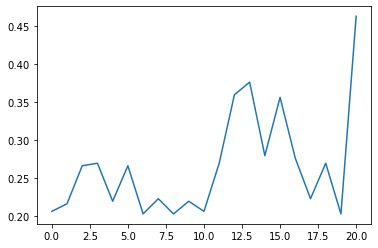

In [17]:
plt.plot(conti.accuracyHist)

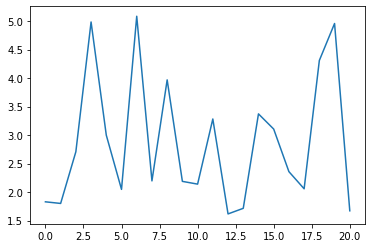

In [18]:
plt.plot(conti.lossHist)

In [15]:
max(conti.accuracyHist)

0.4633333333333333

In [17]:
min(conti.lossHist)

0.4228292261560758

In [19]:
for i in range(0,info['server']['num_round']):
    print("Round {}".format(i))
    conti.roundTrain()
    if(i%2==0):
        print('Server saved {}'.format(i))
        saveServer(conti)

Round 0
There are 100 client in environment
This epoch have clients with id [<__main__.Client object at 0x000001369CF9B820>, <__main__.Client object at 0x0000013705AD6A00>, <__main__.Client object at 0x000001372B346F10>, <__main__.Client object at 0x00000136A979DDF0>, <__main__.Client object at 0x0000013701A28460>, <__main__.Client object at 0x00000137464AB0D0>, <__main__.Client object at 0x00000136AEA355E0>, <__main__.Client object at 0x00000136894A7EE0>, <__main__.Client object at 0x000001371E51EBE0>, <__main__.Client object at 0x00000136E8D4D340>, <__main__.Client object at 0x00000137432796A0>, <__main__.Client object at 0x00000136205F2310>, <__main__.Client object at 0x000001369E569D60>, <__main__.Client object at 0x000001367F973310>, <__main__.Client object at 0x0000013614E6CB20>]
Client 70, data: 70 trainning
Client ID  70 , epoch  0 :  0.12476300597190856
Client ID  70 , epoch  1 :  0.006978047390778859
Client ID  70 , epoch  2 :  0.00043163683731108906
Client ID  70 , epoch  3 

In [10]:
(conti.accuracyHist)

[0.46,
 0.6266666666666667,
 0.7633333333333333,
 0.7966666666666666,
 0.82,
 0.8233333333333334,
 0.8366666666666667,
 0.8433333333333334,
 0.8466666666666667,
 0.85,
 0.8466666666666667,
 0.85,
 0.86,
 0.8666666666666667,
 0.8633333333333333,
 0.8733333333333333,
 0.87,
 0.8733333333333333,
 0.8766666666666667,
 0.88,
 0.8866666666666667,
 0.8666666666666667,
 0.8766666666666667,
 0.8866666666666667,
 0.8833333333333333,
 0.8733333333333333,
 0.8833333333333333,
 0.8933333333333333,
 0.89,
 0.89,
 0.89,
 0.8833333333333333,
 0.89,
 0.8966666666666666,
 0.89,
 0.8866666666666667]

In [ ]:
len(conti.accuracyHist)

43

MobileNetV2(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05,

In [ ]:
torch.save(conti.centralModel.state_dict(), 'parameter.pth')

Text(0, 0.5, 'Accuracy')

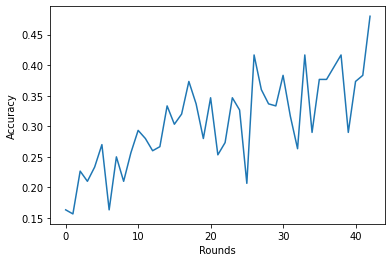

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(0,len(conti.accuracyHist)),conti.accuracyHist,)
plt.xlabel("Rounds")
plt.ylabel("Accuracy")


Text(0, 0.5, 'Loss History')

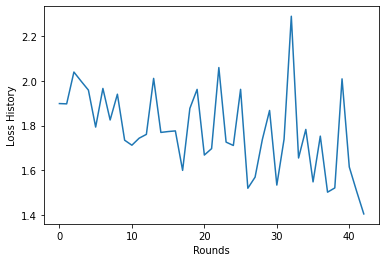

In [ ]:
plt.plot(range(0,len(conti.accuracyHist)),conti.lossHist,)
plt.xlabel("Rounds")
plt.ylabel("Loss History")

In [ ]:
a=[1.8987637519836427, 1.8974739154179892, 2.040224885940552, 1.9990726629892985, 1.959251054128011, 1.7933303674062093, 1.9666422128677368, 1.825169316927592, 1.9407729864120484, 1.7343559583028159, 1.711883536974589, 1.7433618625005087, 1.7605376640955608, 2.011758049329122, 1.7692884127298991, 1.7731905698776245, 1.7760921080907186, 1.5990015029907227, 1.877139433224996, 1.9624298254648844, 1.6677559773127237, 1.69661279519399, 2.0603761355082195, 1.7258090734481812, 1.7107341527938842, 1.962593142191569, 1.518720022837321, 1.5685885270436606, 1.737037189801534, 1.8678918679555256, 1.5330387671788535, 1.738879934946696, 2.290648682912191, 1.6545614878336588, 1.7826974074045816, 1.5473427534103394, 1.752670987447103, 1.5011515061060587, 1.5201624870300292, 2.0096364259719848, 1.6141677856445313, 1.5065311829249064, 1.403585934638977, 1.811416776974996]
len(a)

44

In [ ]:
import joblib 

In [ ]:
joblib.load(open('/content/drive/MyDrive/Prethesis-model/server1 (1).pickle', 'rb'))

KeyError: ignored

Continue Running

In [ ]:
info={'dataset': 'plantdisease',
 'client': {'learning_rate': 1e-05,
  'momentum': 0.0,
  'weight_decay': 1e-05,
  'batch_size': 25
  },
 'server': {'num_clients': 100,
  'num_class': 6,
  'num_round': 100,
  'num_client_perRound': 25,
  'isParallel': 'False',
  'model': 'mobilenetv3',
  'local_epoch': 10}}
best_acc=[999]

from importlib.abc import Loader
import yaml
from yaml.loader import SafeLoader
#Continue 
if __name__ == '__main__':
  def saveServer(server):
    import pickle
    with open('/content/server1.pickle', 'wb') as f:
      pickle.dump(server, f)
      f.close()
    #with open('/content/drive/MyDrive/Prethesis-model/server1.pickle', 'wb') as f:
    #  pickle.dump(server, f)
    #  f.close()
  def saveBestAServer(server,acc):
    import pickle
    with open('/content/drive/MyDrive/Prethesis-model/serverBest.pickle', 'wb') as f:
      pickle.dump(server, f)
      f.close()
    with open('/content/serverBest.pickle', 'wb') as f:
      pickle.dump(server, f)
      f.close()
  def saveBestLServer(server,loss):
    import pickle
    with open('/content/drive/MyDrive/Prethesis-model/serverBestL.pickle', 'wb') as f:
      pickle.dump(server, f)
      print('another best, {} loss'.format(loss))
      f.close()
    with open('/content/serverBestL.pickle', 'wb') as f:
      pickle.dump(server, f)
      f.close()

  import pickle
  with open('/content/drive/MyDrive/Prethesis-model/serverBest.pickle', 'rb') as f:
    conti=pickle.load(f)
    #from torch.utils.tensorboard import SummaryWriter
    #writer = SummaryWriter()
    f.close()
  for i in range(0,info['server']['num_round']):
    print("Round {}".format(len(conti.accuracyHist)))
    conti.roundTrain()
    if conti.accuracyHist[-1]>max(conti.accuracyHist[:-2]):
      saveBestServer(conti,conti.accuracyHist[-1])
    if conti.lossHist[-1]<min(conti.lossHist[:-2]):
      saveBestLServer(conti,conti.lossHist[-1])
    if i%4==0:
      saveServer(conti)
    torch.save(conti.centralModel.state_dict(), '/content/parameter.pt')

KeyboardInterrupt: ignored

Temp

In [ ]:
!cp -b /content/drive/MyDrive/Prethesis-model/server1.pickle /content/drive/MyDrive/Prethesis-model/server1backup.pickle

In [ ]:
import pickle
with open('/content/drive/MyDrive/Prethesis-model/server2.pickle', 'rb') as f:
  contiServer=pickle.load(f)
for i in range(0,info['server']['num_round']):
  print("Round {}".format(i))
  a.roundTrain()
  saveServer(a)

In [ ]:
import os
scores=0
unpickler=0
if os.path.getsize('/content/drive/MyDrive/Prethesis-model/server2.pickle') > 0:      
    with open('/content/drive/MyDrive/Prethesis-model/server2.pickle', "rb") as f:
        unpickler = pickle.Unpickler(f)
        # if file is not empty scores will be equal
        # to the value unpickled
        scores = unpickler.load()
        print(unpickler,scores)

<_pickle.Unpickler object at 0x7f4df5d6b4d0> <__main__.server object at 0x7f4df624e550>


In [ ]:
unpickler

In [ ]:
import pickle
file = open("Fruits.obj",'rb')


In [ ]:
info={'dataset': 'plantdisease',
 'client': {'learning_rate': 7e-06,
  'momentum': 0.0,
  'weight_decay': 1e-05,
  'batch_size': 25,
  'local_epoch': 1},
 'server': {'num_clients': 100,
  'num_class': 6,
  'num_round': 100,
  'num_client_perRound': 25,
  'isParallel': 'False',
  'model': 'mobilenetv3',
  'local_epoch': 10}}
from importlib.abc import Loader
import yaml
from yaml.loader import SafeLoader



if __name__ == '__main__':
    def saveServer(server,i):
        import pickle
        name='/content/drive/MyDrive/Prethesis-model/server{}.pickle'.format(i)
        with open(name, 'wb') as f:
            pickle.dump(server, f)
        print('savedModel')
        
    from torch.utils.tensorboard import SummaryWriter
    #writer = SummaryWriter(
    a=server(tensorboard=0,parameters=info)
    a.generateClient()
    for i in range(0,info['server']['num_round']):
    
      print("Round {}".format(i))
      a.roundTrain()
      if i%4==0:
        saveServer(a,1)
    
    #writer.flush()

KeyboardInterrupt: ignored